## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

### Импортируем бибилотеки

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
plt.style.use('seaborn')
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

### Cоздаём датафреймы

In [5]:
#создаём датафреймы

students = pd.read_csv('students.csv')
courses = pd.read_csv('courses.csv ')
course_contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
progress_phases = pd.read_csv('progress_phases.csv',
                              parse_dates=['start_date', 'finish_date'],
                              dayfirst=False)

#мёрджим датафреймы в один
all_progress = progress_phases.merge\
    (progresses, right_on='id', left_on='progress_id', how='left')

progress_and_content = all_progress.merge\
    (course_contents, how='left', on=['course_id', 'lesson_number', 'module_number'])
progress_and_content.drop(columns='id', inplace=True)  #лишние колонки удаляем

final_df = progress_and_content.merge\
    (courses, how='left', left_on='course_id', right_on='id')
final_df.drop(columns=['id', 'Unnamed: 0'],
              inplace=True)  #лишние колонки удаляем

final_df

progress_id  module_number  lesson_number status  \
0       a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1       a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2       a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
3       a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
4       a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   
...                                  ...            ...            ...    ...   
350672  ea9c93865c1de54a5079b7ae71c88683              3              2  start   
350673  ea9c93865c1de54a5079b7ae71c88683              2              4   done   
350674  ea9c93865c1de54a5079b7ae71c88683              2              3   done   
350675  ea9c93865c1de54a5079b7ae71c88683              2              2   done   
350676  ea9c93865c1de54a5079b7ae71c88683              3              1   done   

                             start_date                      finish_date  \
0      2018-06-23 08:28:50.681065+00:00 2018-06-23 08:28:52.439542+00:00   
1      2018-06-20 14:25:21.783762+00:00 2018-06-20 15:45:07.717209+00:00   
2      2018-06-23 08:18:09.653771+00:00 2018-06-23 08:18:12.784616+00:00   
3      2018-06-20 16:00:06.361780+00:00 2018-06-21 19:09:30.845034+00:00   
4      2018-06-21 19:10:36.957891+00:00 2018-06-28 15:59:25.320418+00:00   
...                                 ...                              ...   
350672 2019-07-16 23:02:33.482900+00:00                              NaT   
350673 2019-07-02 15:34:32.134806+00:00 2019-07-02 16:32:15.491277+00:00   
350674 2019-07-01 21:46:27.908354+00:00 2019-07-01 21:48:04.806799+00:00   
350675 2019-06-30 22:41:33.705765+00:00 2019-07-01 07:44:00.370798+00:00   
350676 2019-07-14 23:36:52.318819+00:00 2019-07-15 12:21:47.908115+00:00   

                              student_id                         course_id  \
0       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
2       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
3       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
4       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
...                                  ...                               ...   
350672  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350673  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350674  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350675  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350676  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   

                                             module_title  \
0                                   Концептуальный дизайн   
1                 Специализация и личное позиционирование   
2                                   Концептуальный дизайн   
3                 Специализация и личное позиционирование   
4                 Специализация и личное позиционирование   
...                                                   ...   
350672  SEO: больше, чем поисковая выдача (обновление ...   
350673  Исследование целевой аудитории: портретировани...   
350674  Исследование целевой аудитории: портретировани...   
350675  Исследование целевой аудитории: портретировани...   
350676  SEO: больше, чем поисковая выдача (обновление ...   

                                         lesson_title  \
0                                   Практика — мокапы   
1                                         Интро курса   
2                     Что такое концептуальный дизайн   
3                             Личное позиционирование   
4                                     Домашняя работа   
...                                               ...   
350672                                  Что такое SEO   
350673           

### Общее количество курсов

In [6]:
# Собираем уникальные значения по названиям курсов и считаем
course_list = list(final_df['title'].sort_values().unique())
count_course = len(course_list)
count_course

15

### Количество модулей на каждом курсе

In [7]:
# Группируем по курсам, считаем уникальные значения модулей по каждому курсу 
modul_count = final_df.groupby('title')['module_title'].nunique().reset_index().sort_values('module_title')
modul_count

title  module_title
4   PHP-разработчик с 0 до PRO. Часть 1             8
8        Веб-вёрстка для начинающих 2.0             8
0                         Excel Базовый             9
2               Java-разработчик c нуля             9
5              SMM-маркетолог от А до Я            11
1                      Java-разработчик            17
9                    Веб-дизайн PRO 2.0            17
10                   Веб-дизайн Базовый            17
14        Руководитель digital-проектов            17
3                     JavaScript с нуля            18
13        Интернет-маркетолог от Ingate            18
11                Веб-дизайн с нуля 2.0            19
6                             UX-дизайн            20
12                      Веб-разработчик            20
7                  Анимация интерфейсов            21

### Количество уроков в каждом модуле на каждом курсе

In [8]:
# Группируем по курса и модулям, считаем уникальные значения названий уроков
lesson_count = final_df.groupby(['title', 'module_number'
                      ])['lesson_title'].nunique().reset_index()
# Для наглядности
lesson_count = lesson_count.pivot_table(values='lesson_title',
                  columns='title',
                  index='module_number')
lesson_count

title          Excel Базовый  Java-разработчик  Java-разработчик c нуля  \
module_number                                                             
1                       11.0               8.0                      7.0   
2                        7.0               8.0                      6.0   
3                        3.0               9.0                     10.0   
4                        7.0               9.0                     27.0   
5                        5.0               7.0                     13.0   
6                        5.0               6.0                     10.0   
7                        5.0               5.0                     12.0   
8                        5.0               7.0                      9.0   
9                        1.0               7.0                     11.0   
10                       NaN               8.0                      NaN   
11                       NaN               6.0                      NaN   
12                       NaN               7.0                      NaN   
13                       NaN               5.0                      NaN   
14                       NaN               7.0                      NaN   
15                       NaN               6.0                      NaN   
16                       NaN               8.0                      NaN   
17                       NaN               1.0                      NaN   
18                       NaN               NaN                      NaN   
19                       NaN               NaN                      NaN   
20                       NaN               NaN                      NaN   
21                       NaN               NaN                      NaN   

title          JavaScript с нуля  PHP-разработчик с 0 до PRO. Часть 1  \
module_number                                                           
1                            7.0                                  5.0   
2                           12.0                                  7.0   
3                            8.0                                  4.0   
4                            9.0                                  4.0   
5                            5.0                                  4.0   
6                            4.0                                  3.0   
7                            5.0                                 13.0   
8                            7.0                                  1.0   
9                            8.0                                  NaN   
10                           9.0                                  NaN   
11                           6.0                                  NaN   
12                           7.0                                  NaN   
13                           9.0                                  NaN   
14                           6.0                                  NaN   
15                           6.0                                  NaN   
16                           7.0                                  NaN   
17                           3.0                                  NaN   
18                           1.0                                  NaN   
19                           NaN                                  NaN   
20                           NaN                                  NaN   
21                           NaN                                  NaN   

title          SMM-маркетолог от А до Я  UX-дизайн  Анимация интерфейсов  \
module_number                                                              
1                                   6.0       10.0                   3.0   
2                                   7.0        6.0                   3.0   
3                                   7.0        5.0                   4.0   
4                                   4.0        4.0                   4.0   
5                                   6.0        1.0                   4.0   
6                                   8.0        7.0            

### Mедианное количество уроков в модуле на каждом курсе

In [9]:
# Снова считаем все уникальные уроки для каждого курса и модуля. Из этих данных берем медиану для кождого курса
median_lesson = final_df.groupby(['title', 'module_title'])['lesson_title']\
    .nunique().reset_index()\
    .groupby(['title']).median().sort_values('lesson_title')
median_lesson

lesson_title
title                                            
Веб-разработчик                               2.0
Анимация интерфейсов                          3.0
Веб-дизайн Базовый                            3.0
UX-дизайн                                     3.5
PHP-разработчик с 0 до PRO. Часть 1           4.0
Веб-дизайн с нуля 2.0                         4.0
Excel Базовый                                 5.0
Веб-дизайн PRO 2.0                            5.0
Руководитель digital-проектов                 5.0
SMM-маркетолог от А до Я                      6.0
Интернет-маркетолог от Ingate                 6.5
Java-разработчик                              7.0
JavaScript с нуля                             7.0
Веб-вёрстка для начинающих 2.0                7.0
Java-разработчик c нуля                      10.0

### Количество учеников на каждом курсе

In [19]:
# Считаем количество уникальных айди студентов, сортируем
students_count = final_df.groupby('title')['student_id'].nunique()\
                            .reset_index().sort_values('student_id')
students_count

title  student_id
5              SMM-маркетолог от А до Я         506
10                   Веб-дизайн Базовый         518
2               Java-разработчик c нуля         581
7                  Анимация интерфейсов         598
12                      Веб-разработчик         628
14        Руководитель digital-проектов         685
1                      Java-разработчик         763
0                         Excel Базовый         782
4   PHP-разработчик с 0 до PRO. Часть 1         854
3                     JavaScript с нуля         966
6                             UX-дизайн        1151
9                    Веб-дизайн PRO 2.0        1711
8        Веб-вёрстка для начинающих 2.0        2004
11                Веб-дизайн с нуля 2.0        2014
13        Интернет-маркетолог от Ingate        2168

In [11]:
    # формируем рабочий датафрейм со студентами
    
students = pd.read_csv('students.csv') 
students_clear = students.dropna() 

    # даты рождения в datetime
    
to_date = lambda x: dt.strptime(str(x), "%Y-%m-%d") 
students_clear['birthday'] = students_clear['birthday'].apply(to_date) 
    
    # вычисляем возраст студентов
    
age = lambda brth: relativedelta(dt.now(), brth).years
students_clear['age'] = students_clear['birthday'].apply(age)

    # отсеиваем сомнительные возрастные категории, которые, возможно, являются ошибочными
    
students_clear = students_clear[(students_clear['age'] < 60) & (students_clear['age'] > 5)]
students_clear.drop(columns='id_', inplace=True)
students_clear.columns = ['student_id', 'city', 'birthday', 'age']
students_clear

<ipython-input-11-f2178fe9924e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_clear['birthday'] = students_clear['birthday'].apply(to_date)
<ipython-input-11-f2178fe9924e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_clear['age'] = students_clear['birthday'].apply(age)


student_id              city  \
1      6c3e52be632fc50de9640147e4017dcd            Москва   
7      35a36d90b745992b59085c8d54a072e7        Красноярск   
8      37e8e8179295ae764524223086b0b568            Москва   
11     fb10649db552c5f451bea45ed754d428   Санкт-Петербург   
15     d15a188c90bb4d83957ac14de78fada4   Санкт-Петербург   
...                                 ...               ...   
43634  2f1dd20d7428dada0c040e7ee7b1462f            Ижевск   
43639  3d7d520c6d739fc8cb844ebdc305743b            Москва   
43703  859b49d2953c191275061f41f1ba09be         Краснодар   
43784  2ea7f5c3346ec6b9b58d7ac15fa9ad61         Хабаровск   
43804  67e72fd4f8810c633c461b01deccadb5  Санкт-Петербурге   

                  birthday  age  
1      1979-10-23 00:00:00   41  
7      1991-08-15 00:00:00   29  
8      1987-08-24 00:00:00   33  
11     1988-07-16 00:00:00   32  
15     1991-01-16 00:00:00   30  
...                    ...  ...  
43634  1996-05-08 00:00:00   25  
43639  1990-02-21 00:00:00   31  
43703  1990-01-03 00:00:00   31  
43784  1993-04-16 00:00:00   28  
43804  1999-02-10 00:00:00   22  

[11255 rows x 4 columns]

### Mинимальный, максимальный, средний, медианный возраст студентов

In [65]:
# Выбираем из describe только интересующие нас значения
students_clear['age'].describe()[['min', 'max','mean', '50%']]

min      7.000000
max     59.000000
mean    30.604442
50%     30.000000
Name: age, dtype: float64

### Mинимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [67]:
    #мёрджим необходимые данные датафреймов, чтобы сопоставить возраст студентов и курсы, на которых они обучаются

data = pd.merge(final_df[['student_id', 'title']], students_clear[['student_id', 'age']], on=['student_id'], how='right')
data.dropna(inplace=True)
data.drop(columns='student_id', inplace=True)

    #чтобы представить все данные по возрастам в едином датафрейме
    #генерируем отдельные запросы(min, max, mean, median) и объединяем их

min_max = data.groupby('title').min().merge(data.groupby('title').max(), \
                                   left_index=True, right_index=True, \
                                   how='left', suffixes=('_min', '_max'))

mean_median = data.groupby('title').mean().merge(data.groupby('title').median(), \
                                   left_index=True, right_index=True, \
                                   how='left', suffixes=('_mean', '_median'))

age_df = min_max.merge(mean_median, how='left', left_index=True, right_index=True)
age_df

age_min  age_max   age_mean  age_median
title                                                                       
Excel Базовый                              8       53  34.133792          34
Java-разработчик                           7       55  30.539144          30
Java-разработчик c нуля                    7       56  30.460838          30
JavaScript с нуля                         14       58  29.274650          29
PHP-разработчик с 0 до PRO. Часть 1       14       58  31.602637          30
SMM-маркетолог от А до Я                  18       53  29.669605          29
UX-дизайн                                 16       58  31.208948          31
Анимация интерфейсов                      16       52  30.715152          30
Веб-вёрстка для начинающих 2.0            14       58  29.399330          28
Веб-дизайн PRO 2.0                        16       59  29.359345          28
Веб-дизайн Базовый                        16       52  29.406517          29
Веб-дизайн с нуля 2.0                     16       59  29.159516          28
Веб-разработчик                           14       52  28.389648          28
Интернет-маркетолог от Ingate             17       59  32.431028          31
Руководитель digital-проектов             21       48  32.920557          32

### Bar-chart отражающий количество студентов на каждом курсе

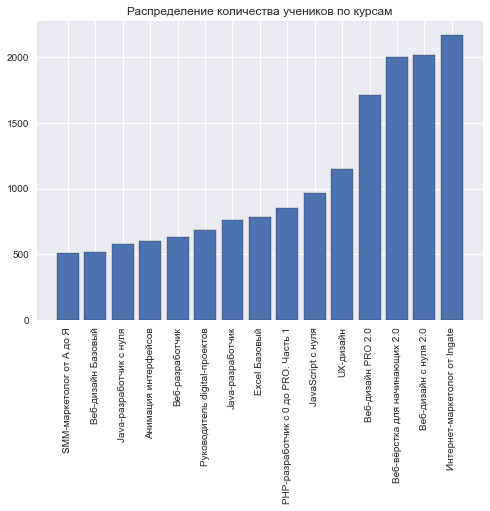

In [68]:
# Строим bar, передаем необходимые значения
plt.bar(x=students_count['title'], height=students_count['student_id'])
plt.xticks(rotation=90)
plt.title('Распределение количества учеников по курсам')
plt.show()

### Горизонтальный bar-chart

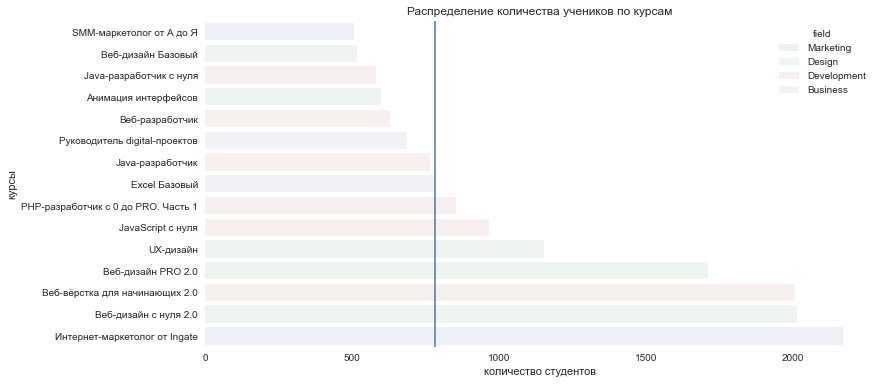

In [26]:
    # сортируем значения для упорядочивания bar-ов
    
order = list(students_count.sort_values('student_id')['title'])
s_count = students_count.merge(final_df[['title', 'field']], left_on='title', right_on='title', how='left')
s_count.drop_duplicates(inplace=True)
    # задаём график

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = s_count, x='student_id', y='title', \
            ax=ax, order=order, dodge=False, hue='field', alpha=0.1)

    # задаём заголовок, убираем рамочку, подписываем оси

ax.set_title('Распределение количества учеников по курсам')
sns.set_theme(style="white")
ax.set_xlabel('количество студентов')
ax.set_ylabel('курсы')
plt.box(on=None)
    
    # линия медианы

ax.axvline(students_count['student_id'].median())


### Описываем полученные данные

In [70]:
# для упрощения описания данных, объединим их в одну табличку
description_df = pd.merge(modul_count, median_lesson, on='title', how='left')
description_df = description_df.merge(students_count, on='title', how='left')
description_df = description_df.merge(age_df, on='title', how='left')
description_df.columns = [
    'title', 'modul_count', 'median_lesson', 'students_count', 'age_min',
    'age_max', 'age_mean', 'age_median'
                         ]
description_df.sort_values('students_count')

title  modul_count  median_lesson  \
4              SMM-маркетолог от А до Я           11            6.0   
7                    Веб-дизайн Базовый           17            3.0   
3               Java-разработчик c нуля            9           10.0   
14                 Анимация интерфейсов           21            3.0   
13                      Веб-разработчик           20            2.0   
8         Руководитель digital-проектов           17            5.0   
5                      Java-разработчик           17            7.0   
2                         Excel Базовый            9            5.0   
0   PHP-разработчик с 0 до PRO. Часть 1            8            4.0   
9                     JavaScript с нуля           18            7.0   
12                            UX-дизайн           20            3.5   
6                    Веб-дизайн PRO 2.0           17            5.0   
1        Веб-вёрстка для начинающих 2.0            8            7.0   
11                Веб-дизайн с нуля 2.0           19            4.0   
10        Интернет-маркетолог от Ingate           18            6.5   

    students_count  age_min  age_max   age_mean  age_median  
4              511       18       53  29.669605          29  
7              518       16       52  29.406517          29  
3              581        7       56  30.460838          30  
14             598       16       52  30.715152          30  
13             628       14       52  28.389648          28  
8              685       21       48  32.920557          32  
5              763        7       55  30.539144          30  
2              782        8       53  34.133792          34  
0              854       14       58  31.602637          30  
9              966       14       58  29.274650          29  
12            1151       16       58  31.208948          31  
6             1711       16       59  29.359345          28  
1             2004       14       58  29.399330          28  
11            2014       16       59  29.159516          28  
10            2168       17       59  32.431028          31

Имея перед глазми таблицу о количестве уроков для каждого модуля, заметно, что составители курсов старались не перегружать модули уроками. Так или иначе в этот список не попадают такие курсы как "Java-разработчик c нуля" и "Интернет-маркетолог от Ingate". На данном этапе никак нельзя сказать, плохо это отразится на сложности обучения или нет. Мы не владеем информацией о наполнении каждого урока, не знаем, сколько времени неоходимо студенту на каждый урок, чтобы делать выводы. В конце концов, модуль из девяти уроков может оказать намного сложнее для студентов, чем модуль из 29 уроков. 

Рассмотрев соотношение количества модулей и медианного значения уроков для каждого курса, можно выделить курсы, связанные с дизайном. У них прослеживается тенденция большого количества модулей и сравнительно небольшого количества уроков. Возможно, это связано с тем, что дизайн как таковой довольно широкая сфера с множеством разных, но не очень глубоких тем. Речь идёт о таких курсах как (Анимация интерфейсов, Веб-дизайн с нуля 2.0, Веб-дизайн PRO 2.0, UX-дизайн, Веб-дизайн Базовый)

Однако сравнительно бОльший показатель одновременно по модулям и по урокам (а также исключительно по показателю медианы количества уроков) принадлежит группе курсов, связанных с языком Java (Java-разработчик c нуля, JavaScript с нуля, Java-разработчик). Очевидно, это связано с большим объемом темы и информации по каждой из них.

По количеству обучающихся открывают рейтинг с показателем в 2168 студентов и закрывают его (511 студентов) курсы, связанные с направлением маркетинг. Данный факт может говорить либо о эффективности, либо об актуальности/новизне одного направления (Интернет-маркетолог от Ingate) по сравнению с другим (SMM-маркетолог от А до Я)

Также довольно популярными курсами по количеству студентов являются именно дизайнерские: Веб-дизайн с нуля 2.0 - 2014 студентов, Веб-дизайн PRO 2.0 - 1711 студентов, UX-дизайн - 1151 студентов. Можно заявить, что это довольно актуальное направление, однако диджитал-сторона дизайна не особо развита среди российских образовательных институтов (художественных школ, колледжей, университетов...), поэтому востребованность данной сферы на онлайн образовательных платформах отчётливо прослеживается. В дополнение данного тезиса заметен яркий пример предпочтения старому курсу обновленный. Так, например, студентов обучающихся на курсе "Веб-дизайн Базовый" всего 518 человек, а на курсе "Веб-дизайн с нуля 2.0" - 2014 человек.
Выделяя курсы по языку Java, можно отметить не особо яркий спрос (581 - 966 студентов). Возможно, это связано с желанием обучаться самостоятельно из-за большого объема бесплатной информации на просторах интернета. Также это может говорить о новизне курсов.

Веб-верстка (один из самых небольших курсов с показателями 8 модулей и медианой в 7 уроков) является одним из самых популярных среди студентов направлений. Такой ажиотаж можно связать с низким порогом вхождения в профессию, малым объемом информации и вследствие этого данное направление считается хорошим вариантом для подработки из дома с минимальными затратами на обучение ресрса времени и материаьных.

По показателям минимального возраста студентов напрашивается вывод, что изучать профессии начинают ребята уже в подростковом возрасте. Однако есть также и удивительные, присущи, возможно, юным гениальным дошколятам в возрасте шести лет записи на курсы по Java-разработке. (Возможно, это лишь ошибка записи даты рождения и стоит строже сортировать данные, но давайте дадим им шанс)

Интересно, что самый высокий показатель из всех минимальных возрастов (21 год) определен на курсе "Руководитель digital-проектов". Скорее всего это связано скорее с ответственностью данного направления (и, возможно, будущей руководительской должности), когда же в подростковом возрасте студенты больше рассчитывают на прикладные навыки.

Стоит начать анализировать максимальный возраст обучающихся с того, что в изначальных необработанных данных были записи более старших студентов (70, 80, 90, 110 лет...). Однако я могу лишь предположить, что это ошибочные данные. Люди в возрасте 50-60 лет, которые получают дополнительное онлайн образование, возможно, лишь пытаются, хоть и не составить конкуренцию молодому поколению, но начать заносить данные в Excel таблицу, а не в блокнот. Стоит посмотреть, какие курсы избираются представителями более старшего поколения.

Хотелось бы обобщить данные по медианному возрасту и среднему, так как они практически идентичны. Однако скажу, что такая близость данных показателей говорит о том, что люди в возрасте 30 лет(с разбросом 2-3 года) чаще обращаются к получению онлайн профессий, чем кто-либо. Это легко объясняется желанием получить возможность развиваться в другой сфере, возможно, более прибыльной и набирающей свою популярность, либо усовершенствовать и актуализировать свои знания для применения в текущей области их работы.


### Прирост студентов на каждом курсе 

In [104]:
    # Для каждого курса выявим модуль с первым домашним заданием
    
first_module_with_homework = final_df[final_df['is_homework'] == True].groupby(['title'])['module_number'].min().reset_index()

    # Оставим датафрейм с айдишками уроков с домашней работой для каждого модуля

lesson_homework = final_df[final_df['is_homework'] == True]
lesson_homework = lesson_homework.groupby(['title','module_number'])['lesson_token'].first().reset_index()

    # Соединим два предыдущих датафрейма в один, чтобы оставить только интересующие нас токены

token_first_homework = first_module_with_homework.merge(lesson_homework, on=['title','module_number'], how='left')

    # Сформируем из них список для дальнейшей сортировки данных

token_list = list(token_first_homework['lesson_token'])

In [105]:
    # создаем датафрейм со всеми студентами, которые начали выполнять первое домашнее задание

growth = final_df[final_df['lesson_token'].isin(token_list)][['title', 'start_date', 'is_homework']]

    # создаем столбец с месяцем и годом начала выполнения домашнего задания

growth['month_year'] = growth['start_date'].dt.to_period('M')

    # сортируем и отбрасываем лишние даты

growth[(growth['month_year'] >= '2016-03') & (growth['month_year'] <= '2019-07')]

    # группируем по курсам, месяцам и считаем количество студентов

growth = growth.groupby(['title', 'month_year'])['is_homework'].count().reset_index()

    # приводим в читабельный вид

growth = growth.pivot_table(values='is_homework', index='month_year', columns='title').reset_index()

growth

C:\Users\evang\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


title month_year  Excel Базовый  Java-разработчик  Java-разработчик c нуля  \
0        2016-03            NaN               NaN                      NaN   
1        2016-11            NaN               NaN                      NaN   
2        2017-03            NaN               NaN                      NaN   
3        2017-04            NaN               NaN                      NaN   
4        2017-05            NaN               NaN                      NaN   
5        2017-06            NaN               NaN                      NaN   
6        2017-07            NaN               NaN                      NaN   
7        2018-01            NaN               1.0                      NaN   
8        2018-02            6.0              14.0                      NaN   
9        2018-03            3.0              26.0                      NaN   
10       2018-04            NaN              14.0                      NaN   
11       2018-05            3.0              25.0                      NaN   
12       2018-06            9.0              33.0                      NaN   
13       2018-07           13.0              48.0                      NaN   
14       2018-08           15.0              29.0                      NaN   
15       2018-09           40.0              53.0                      NaN   
16       2018-10           30.0              33.0                      NaN   
17       2018-11           33.0              32.0                      NaN   
18       2018-12           43.0             102.0                      NaN   
19       2019-01           52.0              75.0                      NaN   
20       2019-02           46.0              50.0                      NaN   
21       2019-03           63.0              74.0                     74.0   
22       2019-04           46.0               7.0                    109.0   
23       2019-05           45.0               4.0                     74.0   
24       2019-06           43.0               4.0                     98.0   
25       2019-07           28.0               3.0                     63.0   

title  JavaScript с нуля  PHP-разработчик с 0 до PRO. Часть 1  \
0                    NaN                                  NaN   
1                    NaN                                  NaN   
2                    NaN                                  NaN   
3                    NaN                                  NaN   
4                    NaN                                  NaN   
5                    NaN                                  NaN   
6                    NaN                                  NaN   
7                    NaN                                  NaN   
8                    NaN                                  NaN   
9                    6.0                                  3.0   
10                   3.0                                  9.0   
11                  13.0                                  7.0   
12                  15.0                                 12.0   
13                  17.0                                 19.0   
14                  18.0                                 18.0   
15                  23.0                                 28.0   
16                  42.0                                 31.0   
17                  36.0                                 27.0   
18                  37.0                                 35.0   
19                  57.0                                 35.0   
20                  42.0                                 23.0   
21                  57.0                                 38.0   
22                  49.0                                 32.0   
23                  51.0                                 30.0   
24                  34.0                                 29.0   
25                  21.0                                 15.0   

title  SMM-маркетолог от А до Я  UX-дизайн  Анимация интерфейсов  \
0                           NaN        NaN                   NaN   
1

###  Line-graph с приростом студентов в каждом месяце для каждого курса

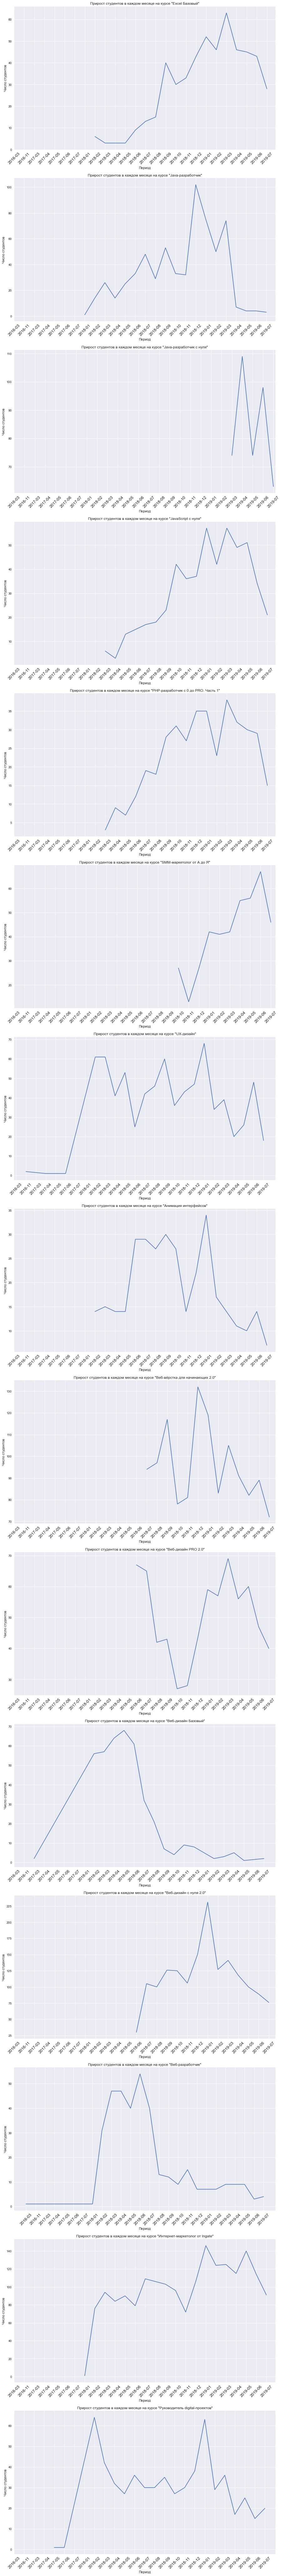

In [7]:
    # создаем вспомогательные листы для засечек и для перечисления колонок

x=list(range(0, len(growth)))
columns_list = list(growth.columns)

    # формируем базу для графика нужного размера с необходимым количеством axes

fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(15, 150))

    # запускаеи через цикл

for i in range(0, count_course):
        sns.lineplot(data=growth, x=x, y=columns_list[i+1], ax=ax[i])
        ax[i].set_xticks(x)        
        ax[i].set_xticklabels(growth['month_year'], rotation=45, fontsize=13)
        ax[i].set_xlabel('Период')
        ax[i].set_ylabel('Число студентов')
        ax[i].set_title('Прирост студентов в каждом месяце на курсе "' + columns_list[i+1] + '"')

### Line-graph с несколькими линиями, отражающими прирост студентов

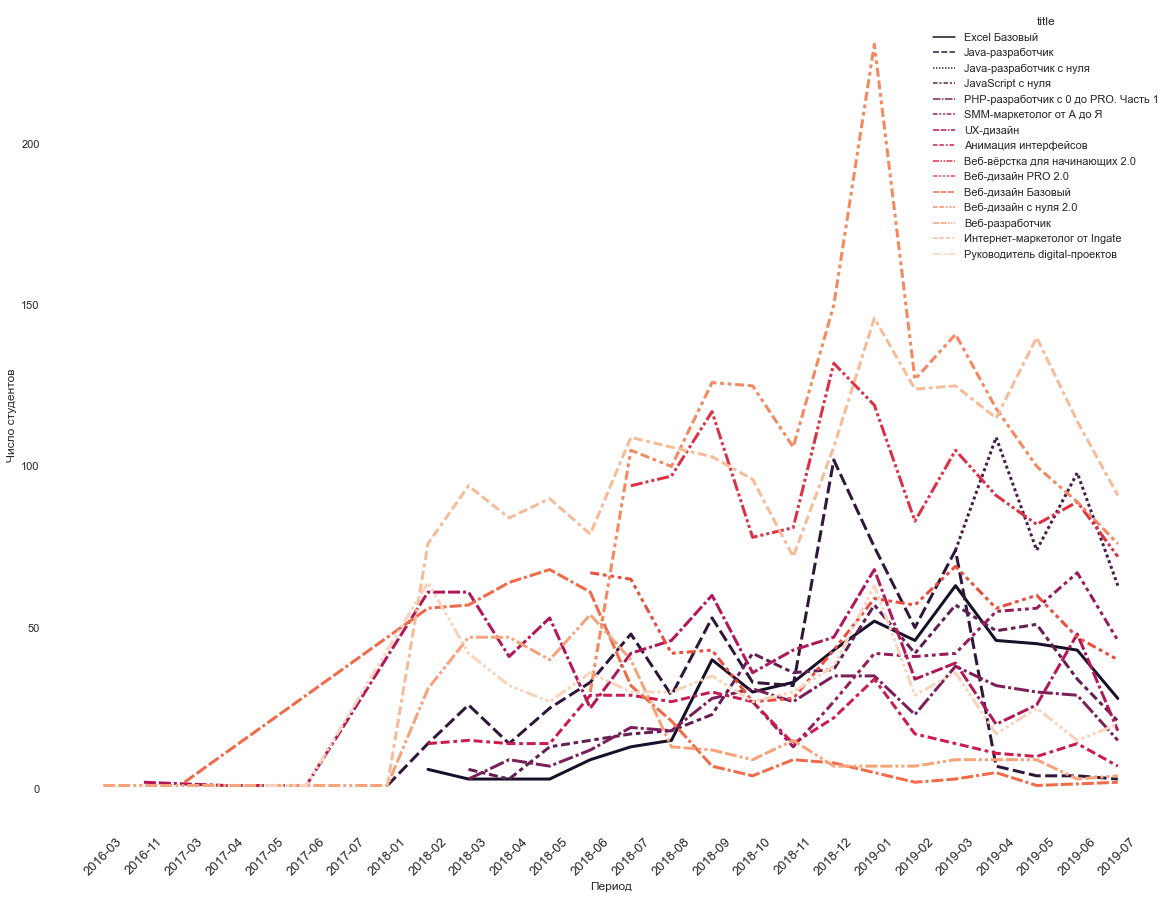

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
# Строим график
sns.lineplot(data=growth, ax=ax, palette='rocket', linewidth=3)
ax.set_xticks(x)
ax.set_xticklabels(growth['month_year'], rotation=45, fontsize=13)
ax.set_xlabel('Период')
ax.set_ylabel('Число студентов')
sns.set_theme(style="white")
plt.box(on=None)

### Количество прогрессов по выполнению домашних работ в каждом месяце 

In [102]:
    # эта функция выдает список месяцев, попавших в период выполнения дз

def funct(a, b):
        if b is pd.NaT:
            b = '2019-07'
        c = pd.period_range(start=a, end=b, freq='M')
        return c

    # отбираем данные, с которыми будем работать

progress_count_sort = final_df[final_df['is_homework'] == True][['start_date', 'finish_date', 'title']]
progress_count_sort = progress_count_sort.set_index('title')

    # вспомогательные список и словарик

index_list = progress_count_sort.index.unique()
my_dict={}

    # запускаем цикл. для каждого курса он отправит каждые дату старта и финиша в функцию сверху 
    # в словаре создаст ключи курсов со значениями всех месяцев

for i in index_list:
        all_months = []
        for a, b in zip(progress_count_sort.loc[i, 'start_date'], progress_count_sort.loc[i, 'finish_date']):
            months = funct(a, b)
            for x in list(months):
                all_months.append(x)
        my_dict[i] = all_months

    # добавляем читабельности словарику:
    
progress_count = pd.DataFrame.from_dict(my_dict,'index').stack().reset_index(level=0)
progress_count[1] = progress_count[0] # Дублирую записи с датами, чтобы было что считать...
progress_count = progress_count.groupby(['level_0', 0]).count().reset_index() # Считаю...
progress_count.columns=['title', 'months', 'count_progress'] # Придаю таблице осмысленности
progress_count = progress_count.pivot_table(values='count_progress', index='months', columns='title').reset_index() # И читабельности
progress_count

title   months  Excel Базовый  Java-разработчик  Java-разработчик c нуля  \
0      2016-03            NaN               NaN                      NaN   
1      2016-11            NaN               NaN                      NaN   
2      2016-12            NaN               NaN                      NaN   
3      2017-01            NaN               NaN                      NaN   
4      2017-02            NaN               NaN                      NaN   
5      2017-03            NaN               NaN                      NaN   
6      2017-04            NaN               NaN                      NaN   
7      2017-05            NaN               NaN                      NaN   
8      2017-06            NaN               NaN                      NaN   
9      2017-07            NaN               NaN                      NaN   
10     2018-01            NaN               1.0                      NaN   
11     2018-02           37.0              29.0                      NaN   
12     2018-03            9.0             116.0                      NaN   
13     2018-04           16.0             126.0                      NaN   
14     2018-05           21.0             142.0                      NaN   
15     2018-06           41.0             201.0                      NaN   
16     2018-07           85.0             274.0                      NaN   
17     2018-08          101.0             277.0                      NaN   
18     2018-09          201.0             315.0                      NaN   
19     2018-10          264.0             390.0                      NaN   
20     2018-11          272.0             393.0                      NaN   
21     2018-12          294.0             572.0                      NaN   
22     2019-01          400.0             684.0                      NaN   
23     2019-02          440.0             708.0                      NaN   
24     2019-03          489.0             800.0                    120.0   
25     2019-04          486.0             648.0                    564.0   
26     2019-05          526.0             611.0                    764.0   
27     2019-06          536.0             581.0                   1126.0   
28     2019-07          501.0             543.0                   1044.0   

title  JavaScript с нуля  PHP-разработчик с 0 до PRO. Часть 1  \
0                    NaN                                  NaN   
1                    NaN                                  NaN   
2                    NaN                                  NaN   
3                    NaN                                  NaN   
4                    NaN                                  NaN   
5                    NaN                                  NaN   
6                    NaN                                  NaN   
7                    NaN                                  NaN   
8                    NaN                                  NaN   
9                    NaN                                  NaN   
10                   NaN                                  NaN   
11                   NaN                                  NaN   
12                  12.0                                  4.0   
13                  23.0                                 26.0   
14                  38.0                                 41.0   
15                  62.0                                 63.0   
16                 113.0                                107.0   
17                 130.0                                109.0   
18                 145.0                                152.0   
19                 226.0                                203.0   
20                 270.0                                212.0   
21                 319.0                                277.0   
22                 473.0                                328.0   
23                 515.0                                311.0   
24                 581.0                                375.0   
25                 605.0     

### Line-graph по количеству прогрессов

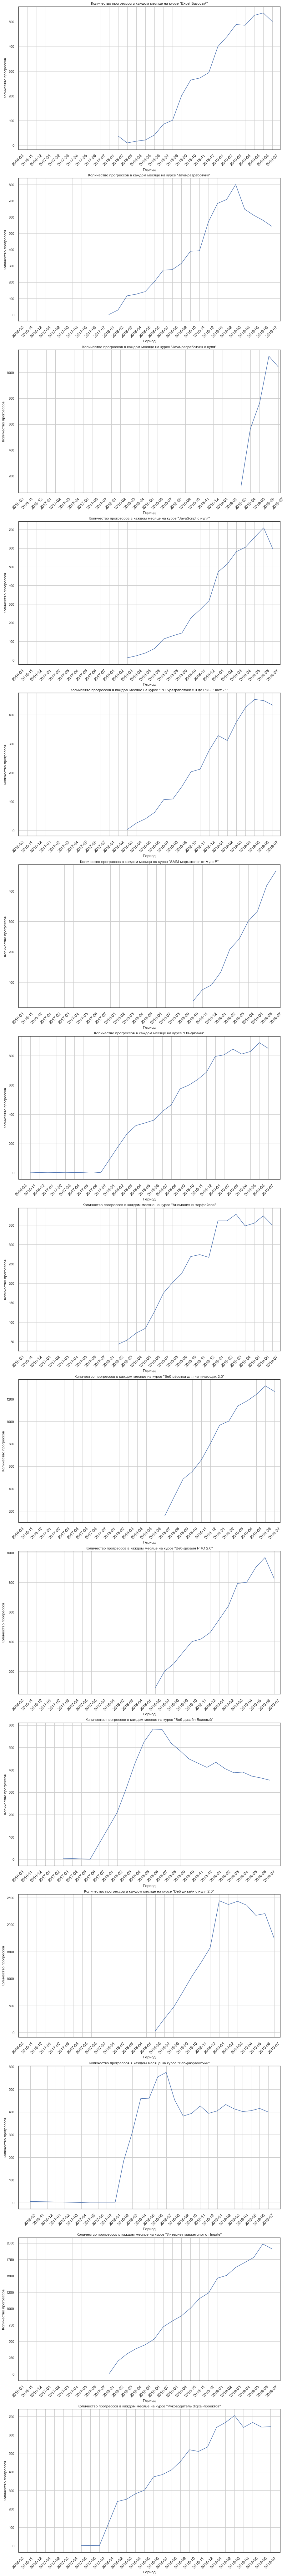

In [115]:
    # создаем вспомогательные листы для засечек и для перечисления колонок

x=list(range(0, len(progress_count)))
columns_list = list(progress_count.columns)

    # формируем базу для графика нужного размера с необходимым количеством axes

fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(15, 150))

    # запускаеи через цикл

for i in range(0, count_course):
        sns.lineplot(data=progress_count, x=x, y=columns_list[i+1], ax=ax[i])
        ax[i].set_xticks(x)        
        ax[i].set_xticklabels(progress_count['months'], rotation=45, fontsize=13)
        ax[i].set_xlabel('Период')
        ax[i].set_ylabel('Количество прогрессов')
        ax[i].set_title('Количество прогрессов в каждом месяце на курсе "' + columns_list[i+1] + '"')
        ax[i].grid()

### Один line-graph для всех курсов по количеству прогрессов

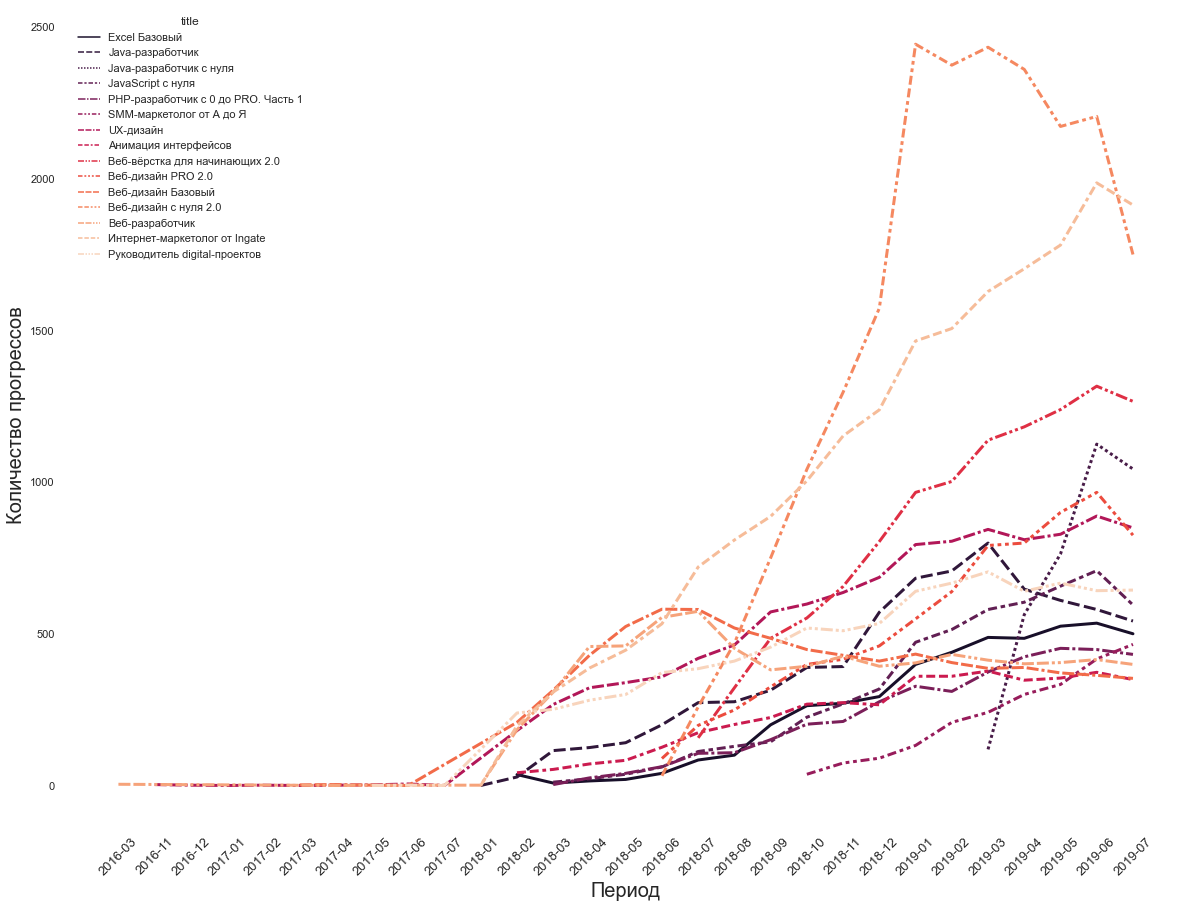

In [100]:
fig, ax = plt.subplots(figsize=(20, 15))
# Строим график
sns.lineplot(data=progress_count, ax=ax, palette='rocket', linewidth=3)
ax.set_xticks(x)        
ax.set_xticklabels(progress_count['months'], rotation=45, fontsize=13)
ax.set_xlabel('Период', fontsize=20)
ax.set_ylabel('Количество прогрессов', fontsize=20)
sns.set_theme(style="white")
plt.box(on=None)

### Аналитический вывод 

Теперь, имея в распоряжении больше данных, можно подтвердить, опровергнуть или расширить гипотезы, выдвинутые в предыдущем анализе.
Так, ранее был замечен факт того, что «рейтинг» по количеству студентов на курсе открывают и закрывают два курса по маркетингу. «Данный факт может говорить либо об эффективности, либо об актуальности/новизне одного направления по сравнению с другим». 
Теперь же мы можем точно сказать, что речь скорее идёт о новизне курса «SMM – маркетолог от А до Я», у которого ежемесячно увеличивается приток студентов, когда же у его «оппонента» он постепенно падает.

Следующая гипотеза, описанная ранее, была не совсем полная и основывалась лишь на логике названий курсов: «Заметен яркий пример предпочтения старому курсу обновленный. Так, например, студентов обучающихся на курсе "Веб-дизайн Базовый" всего 518 человек, а на курсе "Веб-дизайн с нуля 2.0" - 2014 человек». 

На графике прироста студентов хорошо заметен то факт, что с появлением курса «2.0» ежемесячный рост обучающихся на курсе «Веб-дизайн Базовый» начал падать до единичных случаев новых студентов. А также заметен серьезный всплеск заинтересованных в обучении на новом курсе. 

Такая же ситуация наблюдается относительно курсов «Java-разработчик» и «Java-разработчик с нуля». Второй появился спустя 14 месяцев после запуска первого и, очевидно, гарантировал обновленную базу информации и улучшенный ее поток/распределение по модулям и урокам. 

Итак, можно наблюдать спад популярности на курсах Java-разработчик и Веб-дизайн базовый с появлением заменяющих их, обновленных курсов Java-разработчик с нуля и Веб-дизайн с нуля 2.0. Вместе с появлением новых курсов приток студентов на старые их версии падает, соответственно уменьшается и нагрузка на преподавателей, курирующих данные (старые) курсы. Однако, студенты, уже начавшие проходить эти курсы, никуда не делись, и нагрузка не пропадает в тот же месяц, а падает постепенно с завершение обучения курса студентов.

Дополняя тему Java-направлений, в предыдущем анализе было описано предположение о том, что такие направления не имеют высокий спрос. На графике видно, что ежемесячный прирост студентов редко превышает отметку в 60 человек. Однако это конечно не маленький показатель, но так как «высокий спрос» - относительное понятие, то, по сравнению с направлением веб-дизайна и его стабильным ежемесячным приростом в сто и более студентов, спрос на направления Java можно назвать «средним».

Итак, теперь очевидна зависимость количества прогрессов от прироста студентов (хотя это и так было очевидно).

На графиках прироста студентов практически нет явной последовательной эскалации данных показателей, в большинстве своём они либо падают, либо хаотичны. Так или иначе резкого отображения  на показателях прогрессов мы проследить не можем, скорее наоборот, на большинстве графиков прогрессов мы видим стабильный рост, однако уже можем наблюдать период стагнации на курсах "Веб-разработчик", "Веб-дизайн с нуля 2.0" и "Анимация интерфейсов".

Практически на всех курсах заметен стабильный рост прогрессов (исключения зафиксированы абзацами выше), однако если обратить внимание на последний месяц у каждого курса, виден спад местами практически незаметный, местами довольно яркий. Интересен тот факт, что с нашей стороны нельзя точно сказать обусловлен ли данный феномен временем года или это начало последовательного спада показателей. Даже прослежиание изменения прогрессов того же месяца предыдущего года не даст нам возможности сопаоставить данные из-за новизны курсов.



###  Минимальное, максимальное, среднее, медианное время прохождения каждого модуля

In [48]:
    # тут будут функции для работы с датами
    
def minimum(x):
        return x.min()

def maximum(x):
        return x.max()

def median(x):
        return x.median(numeric_only=False)

def mean(x):
        return x.mean(numeric_only=False)
    
    # отбираем нужные данные

count_time = final_df[final_df['is_homework'] == True]\
                [['title', 'student_id', 'module_number', 'lesson_number', 'start_date', 'finish_date']]
count_time.dropna(inplace=True)

    # выделяем все курсы их модули и уроки в датафрейм

count_time = count_time.set_index(['title','module_number', 'lesson_number']).sort_index()
index_list = list(count_time.index.unique())
index_df = pd.DataFrame(index_list)

    # определяем уроки с первой домашкой и последней для каждого модуля

hw = index_df.groupby([0, 1]).agg({2: ['min', 'max']}).reset_index()
hw.columns = [0, 1, '2 start', '2 finish']

    # подтягиваем данные с датами и временем. отдельно для первой домашки, отдельно для последней

count_time = count_time.reset_index()

hw = hw.merge(count_time[['title','module_number', 'lesson_number', 'start_date', 'student_id']], \
              how='left', left_on=[0,1, '2 start'], right_on=['title','module_number', 'lesson_number'])

hw.drop(columns = [0, 1], inplace=True)

hw = hw.merge(count_time[['title','module_number', 'lesson_number', 'finish_date', 'student_id']], \
              how='left', left_on=['title','module_number', '2 finish','student_id'], \
              right_on=['title','module_number', 'lesson_number', 'student_id'])

hw.drop(columns = ['lesson_number_x', 'lesson_number_y'], inplace=True)
hw.dropna(inplace=True)

    # высчитываем потраченное время 

hw['time'] = hw['finish_date'] - hw['start_date']
hw = hw[hw['time'] > '0 days 01:00:00'] # удаляем странные данные, где домашняя работа была закончена раньше чем начата 
                                        # (студенты очевидно попали в сингулярность и заблудились)
                                        # и дадим преподавателю хотя бы час на проверку... они же не роботы
hw = hw.groupby(['title', 'module_number'])['time'].agg([minimum, maximum, median, mean]).reset_index()

hw

title  module_number                minimum  \
0                    Excel Базовый            1.0 0 days 01:07:00.772024   
1                    Excel Базовый            2.0 0 days 01:12:07.877337   
2                    Excel Базовый            3.0 0 days 01:15:34.193597   
3                    Excel Базовый            4.0 0 days 01:45:43.006464   
4                    Excel Базовый            5.0 0 days 01:22:41.490445   
..                             ...            ...                    ...   
185  Руководитель digital-проектов           12.0 0 days 02:10:45.464381   
186  Руководитель digital-проектов           13.0 0 days 18:15:58.759573   
187  Руководитель digital-проектов           14.0 0 days 20:49:06.138087   
188  Руководитель digital-проектов           15.0 0 days 02:04:46.593517   
189  Руководитель digital-проектов           16.0 0 days 14:05:09.558358   

                     maximum                    median  \
0   183 days 17:57:52.247793    2 days 08:40:45.974024   
1   184 days 06:27:48.841839    1 days 21:01:13.991084   
2    89 days 03:11:50.758958    1 days 12:26:56.335478   
3   327 days 13:09:58.465046    3 days 06:06:38.675476   
4   175 days 13:10:49.724595 3 days 02:03:42.691376500   
..                       ...                       ...   
185 211 days 13:38:10.145467 8 days 00:58:43.245886500   
186 246 days 20:15:03.960003   13 days 22:45:31.660429   
187 199 days 03:15:55.467643    9 days 00:28:13.065047   
188 132 days 04:58:36.764804 2 days 22:32:37.197003500   
189 355 days 15:06:19.654443    7 days 09:27:37.041073   

                          mean  
0    6 days 01:42:11.644818685  
1    4 days 08:37:52.911003725  
2    3 days 11:38:35.457273744  
3   11 days 00:52:27.254254364  
4    7 days 10:54:43.013561834  
..                         ...  
185 23 days 09:14:05.652148712  
186 29 days 11:19:29.330151344  
187 16 days 17:31:40.340820571  
188  7 days 13:43:43.347211678  
189 21 days 02:26:23.835214320  

[190 rows x 6 columns]

### Line-graph с медианным временем прохождения каждого модуля для каждого курса

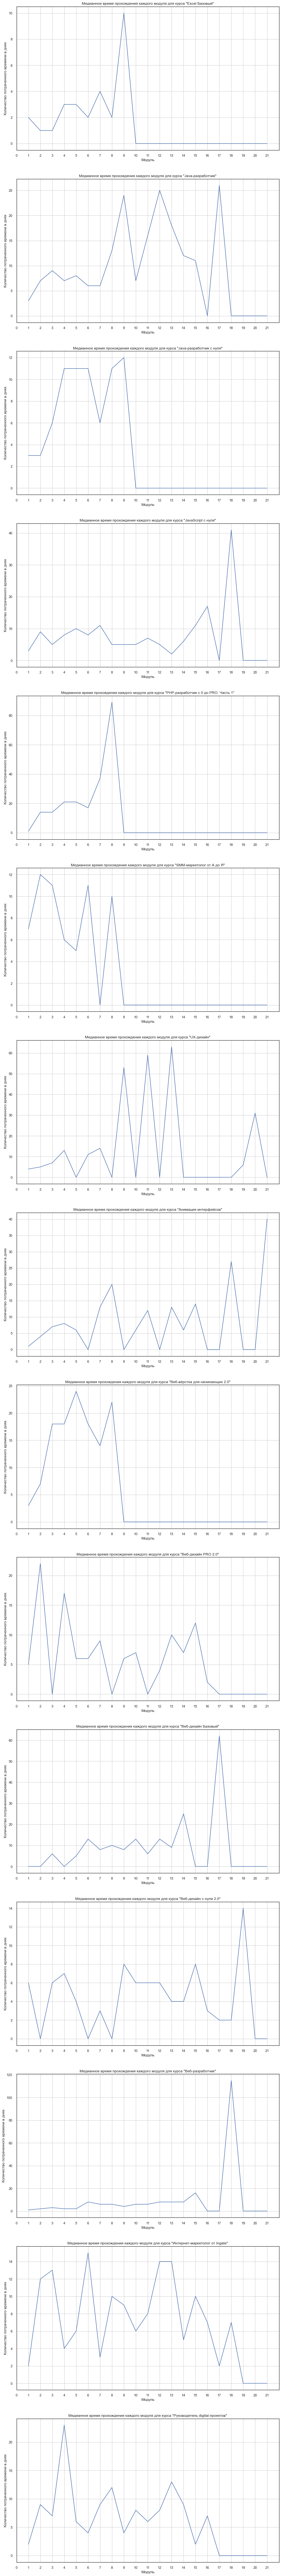

In [96]:
    # создаем датафрейм

hw1 = hw.iloc[:,2].reset_index()
hw1['median'] = hw1['median'].dt.days 
hw1 = hw1.pivot(values='median', columns='title', index='module_number').reset_index()
hw1 = hw1.fillna(0) #замещаем NaN-ы значениями, с которыми можно работать
    
    # вспомогательные вычисления
        
columns_list = list(hw1.columns)

    # формируем базу для графика нужного размера с необходимым количеством axes

fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(15, 150))

    # запускаем через цикл

for i in range(0, count_course):        
        
        ax[i].plot(hw1['module_number'], hw1[columns_list[i+1]])        
    
    # остальное по мелочи (засечки по ОХ, подпись осей, название графика и сетка)
    
        ax[i].set_xticks(range(0, hw1.shape[0]+1))
        ax[i].set_xticklabels(list(range(0, 22)))
        ax[i].set_xlabel('Модуль')
        ax[i].set_ylabel('Количество потраченного времени в днях')
        ax[i].set_title('Медианное время прохождения каждого модуля для курса "' + columns_list[i+1] + '"')
        ax[i].grid()

### Cезонность

In [111]:
    # выбираем данные (курсы, домашние работы, даты начала и завершения)

seasonality = final_df[final_df['is_homework'] == True][['start_date', 'finish_date', 'title']]
seasonality = seasonality.set_index('title')

    # производим расчёты (получаем номер месяца и выполнение работы в днях)

seasonality['start_month'] = seasonality['start_date'].dt.month
seasonality['time'] = seasonality['finish_date'] - seasonality['start_date']
seasonality['time'] = seasonality['time'].dt.days
seasonality

    # удаляем лишние данные,  высчитываем медиану и приводим к нужному виду

seasonality.drop(columns=['start_date', 'finish_date'], inplace=True)

seasonality = seasonality[seasonality['time'] >= 0] # боремся с сингулярностью 

seasonality = seasonality.groupby(['title','start_month'])['time'].median(numeric_only=False).reset_index()
seasonality = seasonality.pivot(values='time', index='start_month', columns='title')
seasonality

title        Excel Базовый  Java-разработчик  Java-разработчик c нуля  \
start_month                                                             
1                      2.0               5.0                      NaN   
2                      2.0               4.0                      NaN   
3                      2.0               6.5                      6.0   
4                      1.0               9.0                      3.0   
5                      2.0               9.0                      3.0   
6                      2.0               7.0                      2.0   
7                      1.0               7.0                      1.0   
8                      3.0              14.0                      NaN   
9                      2.0              11.0                      NaN   
10                     2.0              12.5                      NaN   
11                     2.0               8.0                      NaN   
12                     4.0               3.0                      NaN   

title        JavaScript с нуля  PHP-разработчик с 0 до PRO. Часть 1  \
start_month                                                           
1                          6.0                                 11.0   
2                          5.0                                  7.5   
3                          5.5                                  9.5   
4                          4.0                                 10.0   
5                          5.0                                 10.0   
6                          5.0                                  8.0   
7                          7.0                                  6.0   
8                          7.0                                 13.5   
9                         11.0                                  9.5   
10                        12.0                                 24.5   
11                         9.0                                 22.5   
12                         8.0                                  8.0   

title        SMM-маркетолог от А до Я  UX-дизайн  Анимация интерфейсов  \
start_month                                                              
1                                12.0        9.0                   6.0   
2                                11.0        4.0                   2.5   
3                                11.0        9.0                   7.0   
4                                 8.0        8.0                   5.0   
5                                10.0        8.0                   6.0   
6                                 7.0        6.0                   4.0   
7                                 4.0        6.0                   5.0   
8                                 NaN        9.5                   3.0   
9                                 NaN       11.0                   7.0   
10                               17.5       13.0                   5.0   
11                               17.0       10.0                   8.0   
12                               24.0       10.5                  11.0   

title        Веб-вёрстка для начинающих 2.0  Веб-дизайн PRO 2.0  \
start_month                                                       
1                                       9.0                10.0   
2                                       8.5                 8.0   
3                                       8.0                 7.0   
4                                       9.0                 6.5   
5                                       8.0                 5.0   
6                                       5.0                 4.0   
7                                       3.0                 8.0   
8                                       7.0                31.0   
9                                      10.0                27.0   
10                                     11.0                17.5   
11                                     10.0                10.0   
12                                      8.0                11.0   

title 

### Line-graph seasonality

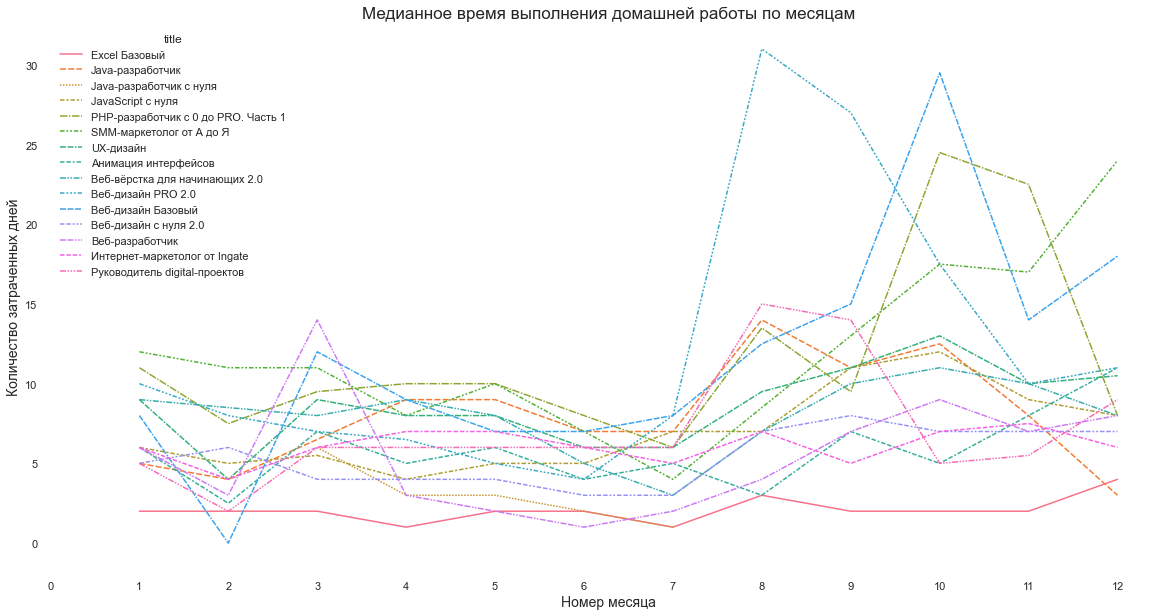

In [53]:
fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(data=seasonality, ax=ax)   # создаём график

ax.set_title('Медианное время выполнения домашней работы по месяцам', fontsize=17)
ax.set_xlabel('Номер месяца', fontsize=14)
ax.set_ylabel('Количество затраченных дней', fontsize=14)
ax.set_xticks(range(len(seasonality)+1))                            # делаем график покрасивше
sns.set_theme(style="white")
plt.box(on=None)

### Анализ

Можно заметить определенную тенденцию на половине курсов, заканчивать обучение большой проектной работой, которая отражается в статистике в виде невероятно больших показателей медианного количества дней на выполнение работы. Это связано с плохим распределением нагрузки, на мой взгляд. Проектная работа подразумевает под собой обобщение всех знаний, накопленных во время курса, но грамотнее бы было начинать вводить в финальную работу заранее, увеличивая масштабы работ, связывая модули между собой, чтобы студент не растерялся и не потратил четыре месяца на завершение последнего проекта.

Раскрывая ничем не подтвержденные данные о «четырёх месяцах», я кратко опишу данные по курсу «Веб-разработчик». Данное направление определённо сфокусировало в финальной проектной работе применение всех навыков и знаний из предыдущих модулей. На выполнение данного проекта (115 дней) студенты тратят больше, чем суммарно потратили на выполнение всех домашних заданиях (сумма медиан по каждому модулю – 86 дней).

Из всех курсов особенно выделяется «UX - дизайн» своей невероятно неравномерной нагрузкой на студентов. Домашнее задание половины модулей выполняется меньше, чем за день, и есть три модуля на выполнение которых студенты тратят по два месяца.

Можно также обратить внимание на небольшой курс размером в 8 модулей «Веб-верстка для начинающих 2.0». По названию можно понять, что курс обновлялся причем довольно успешно. Прослеживается равномерное распределение информации на обучающихся. Следует заметить стабильность во времени выполнения домашних работ (около 20 дней). Возвращаясь в выдвинутой ранее гипотезе о студентах, которые приходят на данный курс («Такой ажиотаж можно связать с низким порогом вхождения в профессию, малым объемом информации и вследствие этого данное направление считается хорошим вариантом для подработки из дома с минимальными затратами на обучение»). Есть вероятность, что те, кто изучает данное направление не могут уделять больше условно двух дней в неделю, оттого медиана указывает на неспешное выполнение заданий. Но нельзя без подтверждений игнорировать и другую гипотезу о том, что, возможно, следует разбить данные задания на несколько модулей, чтобы студенты, уделяя одной теме месяц упорной работы, не забывали предыдущий материал.

Ранее было замечено, что среди курсов существуют те, которые являются новыми версиями других. Рассматривая Веб-дизайн базовый (старый курс) и Веб-дизайн 2.0 (новый курс) по показателям медианного времени выполнения домашних работ, можно заметить более равномерное распределение нагрузки в обновленной версии Веб-дизайна. В особенности бросается в глаза решение проблемы времязатратного финального проекта. Старый вариант курса предполагал медианное время для последней работы около 62 дней, когда же показатели в новом курсе показатели упали до 14 дней.

Что касается второй пары (Java-разработчик и Java-разработчик с нуля), видно, что разработчики постарались сжать информацию для новичков. Очевидно, новый курс полностью не заменяет старый так как обладает лишь частью информации старого курса. Возможно, это шаг к на пути к разбиению одного курса на два в зависимости от способностей учеников.

Далее хотелось бы заметить перегруженность курса «PHP-разработчика с 0 до PRO Часть 1». Учитывая нагрузку на студентов на каждом модуле, название курса («Часть 1») добавляет абсурдности ситуации. Если курс делили по частям, то с этой частью вышло не особо хорошо. На каждый модуль студенты тратят по полмесяца, а ближе к финалу курса эта цифра вырастает до трёх месяцев. Следует разбить данную часть на более равномерные модули, а в особенности последний. Такой объёмный и сжатый курс вряд ли хорошо укладывается в головах студентов.

Также мы обладаем данными о медианном времени, потраченном на домашнее задание по месяцам. На графике мы визуально можем проследить общий рост медианного времени к августу-октябрю, а в феврале и июле спад. Сложно сказать, что время года всподвигло на данные изменения. Для более точного изучения данной зависимости стоит разбить студентов на кластеры взависимости от их возраста, рода деятельности и свободного времени.

Так, например, среди студентов курсов, есть вероятность, что продуктивность будет расти (а потраченное время обратно-пропорционально уменьшаться) в июне-августе, и падать в декабре-мае для ребят, обучающихся в школах и ВУЗах. Для работающих, продуктивность может возрасти в праздничные дни. 

Ранее было описано наблюдение увеличение количества прогрессов в первый месяц года, однако по статистике медианного времени мы не можем сделать такие выводы. 


### Расчет конверсии

In [144]:
# отбираем необходимые данные (строки с домашней работой, курс, модуль, урок)

data_conversion = final_df[(final_df['is_homework'] == True)] \
                            [['title', 'module_number', 'lesson_number','status']]

# формируем датафреймы с уроками, которые завершают модуль и уроками, которые открывают модуль
# различия в том, что для завершения мне нужна последняя домашняя работа, а для начального - первая
# также для модуля с завершающими домашними работами удаляем последние модули (потому что студен никуда дальше не переходит)
# следуя такой же логике удаляем первые модули из стартового датафрейма

data_conversion.sort_values(['title', 'module_number', 'lesson_number'],
                            inplace=True)

end_module = data_conversion.groupby(['title', 'module_number'
                                      ])['lesson_number'].last().reset_index()
drop_list = list(end_module.groupby('title')['module_number'].last())
end_module = end_module.set_index(['title', 'module_number'])

# удаляем все последние модули

for i, a in zip(course_list, drop_list):
    sort = (end_module.index.get_level_values(0)
            == i) & (end_module.index.get_level_values(1) == a)
    end_module.drop(end_module.index[sort], inplace=True)
end_module.reset_index(inplace=True)

#повторяем манипуляции для второго датафрейма

start_module = data_conversion.groupby(
    ['title', 'module_number'])['lesson_number'].first().reset_index()
drop_list = list(start_module.groupby('title')['module_number'].first())
start_module = start_module.set_index(['title', 'module_number'])

# удаляем вссе первые модули

for i, a in zip(course_list, drop_list):
    sort = (start_module.index.get_level_values(0)
            == i) & (start_module.index.get_level_values(1) == a)
    start_module.drop(start_module.index[sort], inplace=True)

    # в датафрейме были замечены сомнительные, не внушающие доверия записи
    # исключительно трёх существующих и невыполненных домашних работах данного курса, данного модуля
    # на правах здравого смысла они будут удалены:

sort = (start_module.index.get_level_values(0) == 'Анимация интерфейсов') & (
    start_module.index.get_level_values(1) == 12)
start_module.drop(start_module.index[sort], inplace=True)

# далее примёрджим данные статуса: для стартового все статусы, для завершающего только done
# и еще немного колдовства с индексами, чтобы было попроще

data_conversion = data_conversion.set_index(
    ['title', 'module_number', 'lesson_number'])
end_module = end_module.reset_index().set_index(
    ['title', 'module_number', 'lesson_number'])
start_module = start_module.reset_index().set_index(
    ['title', 'module_number', 'lesson_number'])

end_module = end_module.merge(data_conversion['status'],
                              left_index=True,
                              right_index=True,
                              how='left')
end_module = end_module[end_module['status'] == 'done']

start_module = start_module.merge(data_conversion['status'],
                                  left_index=True,
                                  right_index=True,
                                  how='left')

# мы получаем посчитанное количество студентов для каждого модуля

end_module = end_module.groupby(['title', 'module_number',
                                 'lesson_number']).count()
start_module = start_module.groupby(
    ['title', 'module_number', 'lesson_number']).count()

# приводим в потребное состояние

end_module.drop(columns='index', inplace=True)

start_module.columns = ['start_module']
end_module.columns = ['finish_module']

start_module.reset_index(inplace=True)
end_module.reset_index(inplace=True)

# подставляем данные в один датафрейм и рассчитываем конверсию

start_module['finish_previous_module'] = end_module['finish_module']
start_module['conversion'] = start_module['start_module'] / start_module[
    'finish_previous_module']

start_module.drop(
    columns=['lesson_number', 'start_module', 'finish_previous_module'],
    inplace=True)

conversion = start_module.groupby(
    'title')['conversion'].mean().sort_values().reset_index()
conversion

title  conversion
0         Интернет-маркетолог от Ingate    0.966075
1                         Excel Базовый    0.974661
2               Java-разработчик c нуля    0.993268
3                 Веб-дизайн с нуля 2.0    0.995029
4                      Java-разработчик    0.997445
5                  Анимация интерфейсов    0.997562
6         Руководитель digital-проектов    1.003353
7                    Веб-дизайн PRO 2.0    1.003841
8                    Веб-дизайн Базовый    1.008532
9                     JavaScript с нуля    1.013623
10       Веб-вёрстка для начинающих 2.0    1.025724
11                      Веб-разработчик    1.062447
12  PHP-разработчик с 0 до PRO. Часть 1    1.079474
13                            UX-дизайн    1.223815
14             SMM-маркетолог от А до Я    1.595499

### Bar-chart, отражающий конверсию

Text(0, 0.5, 'Курс')

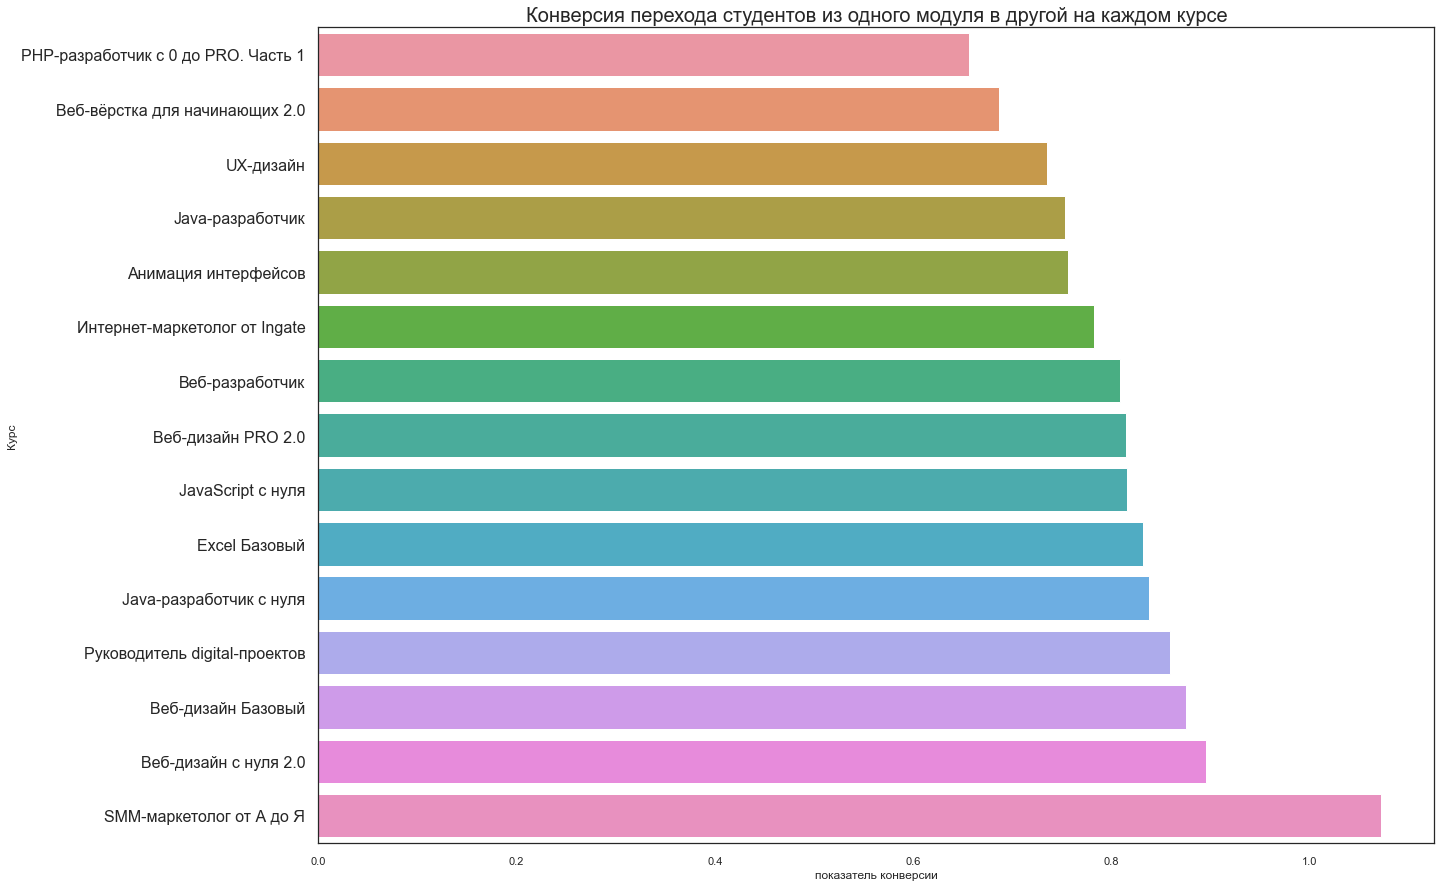

In [141]:
fig, ax = plt.subplots(figsize=(20, 15))

# строим график

sns.barplot(data=conversion, y='title', x='conversion', ax=ax)
ax.set_yticks(range(15))
ax.set_yticklabels(labels=conversion['title'], fontsize=16)
ax.set_title(
    'Конверсия перехода студентов из одного модуля в другой на каждом курсе',
    fontsize=20)
ax.set_xlabel('показатель конверсии')
ax.set_ylabel('Курс')

### Bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

C:\Users\evang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\evang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\evang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\evang\anacond

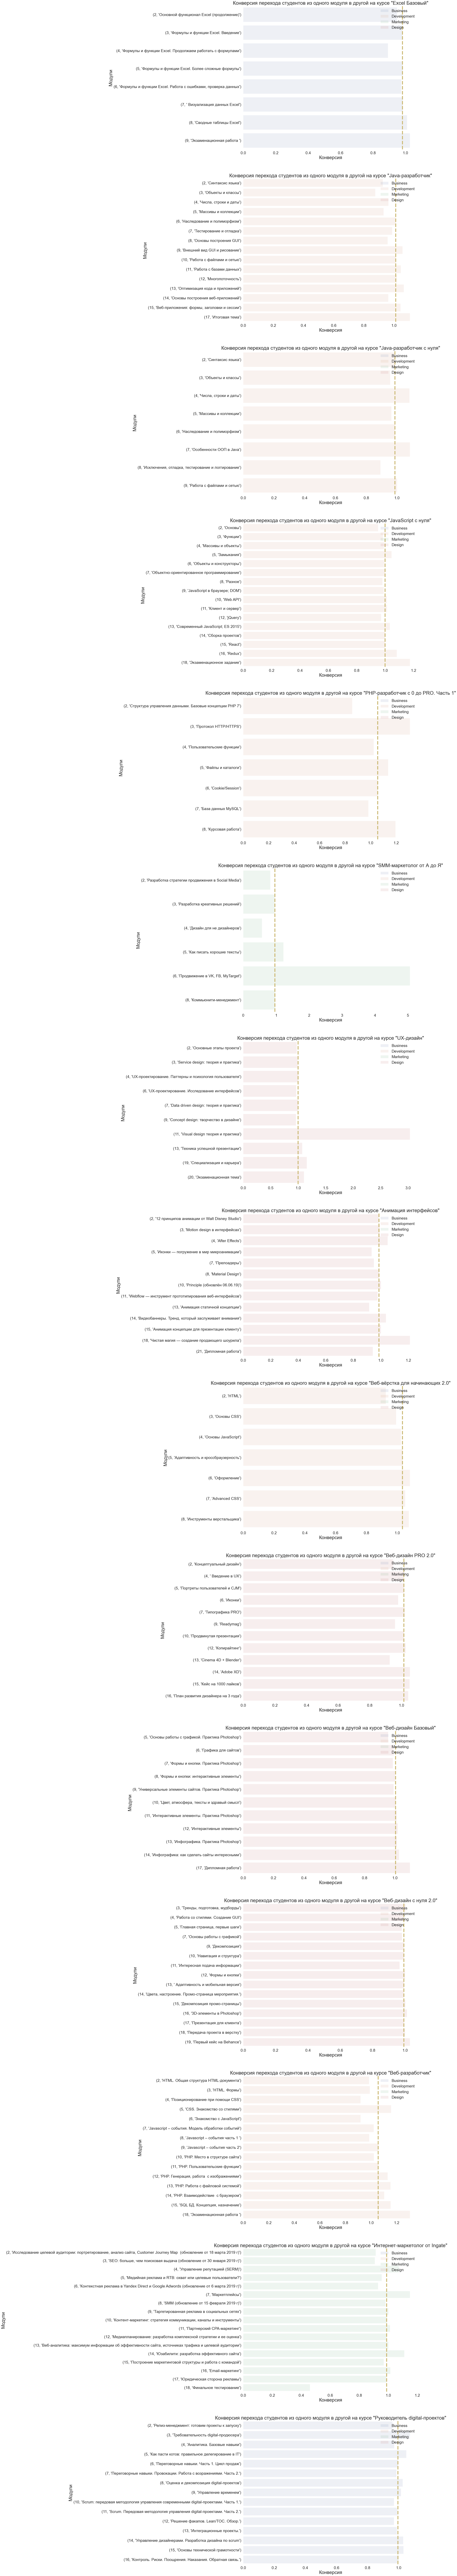

In [145]:
# Производим допольнительные операции :
# Добавляем столбец со сферой курса
sphere = final_df[['field', 'title']].drop_duplicates().sort_values('title')
start_module = start_module.merge(sphere, on='title')
# Добавляем название модулей для засечек
yticks = final_df[['title', 'module_number', 'module_title']].drop_duplicates()
start_module = start_module.merge(yticks,
                                  on=['title', 'module_number'],
                                  how='left')
# Высчитываем медиану
median = start_module.groupby(
    'title')['conversion'].median().sort_values().reset_index()

# Начинаем строить график

fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(20, 300))
# Задаём х,у, легенду по сфере, датафрейм и горизонтальную ориентацию
for course, i in zip(course_list, range(count_course)):
    sns.barplot(start_module[start_module['title'] == course]['conversion'], start_module[start_module['title'] == course]['module_number'], \
                hue='field', data=start_module, orient='h', ax=ax[i], dodge = False, alpha=0.1)
# Устанавливаем название графиков
    ax[i].set_title(
        'Конверсия перехода студентов из одного модуля в другой на курсе "' +
        course + '"',
        fontsize=32)
# Задаем параметры засечек 
    ax[i].tick_params(labelsize=25)
# Создаём датафрейм по текущему курсу с необходимой информацией для засечек и сами засечки
    a = start_module[start_module['title'] == course][[
        'module_number', 'module_title'
    ]]
    ax[i].set_yticklabels(dict(zip(a.iloc[:, 0], a.iloc[:, 1])).items())
# Задаём медиану
    ax[i].axvline(x=median[median['title'] == course]['conversion'].item(),
                  c='y',
                  linewidth=6,
                  linestyle='--')
    ax[i].legend(fontsize=25, loc='upper right')
# Убираем рамки
    ax[i].set_frame_on(False)
# Подписываем оси    
    ax[i].set_xlabel('Конверсия', fontsize=30)
    ax[i].set_ylabel('Модули', fontsize=30)

### Анализируем

Заметна тенденция низкой конверсии на последних модулях:

Excel базовый – 50% (Экзаменационная работа)

Java-разработчик – 40% (Итоговая тема)

JavaScript с нуля – 59% (Экзаменационное задание)

PHP-разработчик с 0 до PRO. Часть 1 – 28% (Курсовая работа)

UX-дизайн – 14% (Экзаменационная тема)

Анимация интерфейсов – 31% (Дипломная работа)

Веб-дизайн Базовый – 70% (по сравнению с предыдущими модулями с конверсией в примерно 90%) (Дипломная работа)

Веб-дизайн с нуля 2.0 – 67% (Первый кейс)

Веб-разработчик – 21% (Экзаменационная работа)

Интернет-маркетолог от Ingate – 32% (Финальное тестирование)

Прослеживается данное падение в тех курсах, где последним модулем является проектная работа/экзамен/кейс/дипломная работа/финальное тестирование. При этом конверсия включает в себя тех, кто хотя бы приступил к работе и не обязательно закончил, так что показатель завершенности работы, скорее всего, будет еще меньше. В дальнейшем можно изучить данный вопрос глубже

Такую закономерность можно связать с нежеланием или неготовностью к большой проектной работе. Возможно, некоторые студенты уже применяют полученные ранее навыки, поэтому не считают для себя необходимостью выполнять итоговое задание, чтобы проверить, насколько они владеют знаниями на практике.

Также хотелось бы заметить отсутствие зависимости среднего выполнение итогового задания и показателя конверсии (конечно же студент не владеет этими данными, но так или иначе ученики общаются между собой и могут оценить масштаб задания). 

Еще следует учесть мнение самих студентов. Возможно, они хотят видеть совершенно другой проект в своём портфолио, поэтому работают над личным проектом, не желая тратить время на предложенный. Если пожелания разнятся, для них следует предоставить выбор из нескольких самых популярных вариантов кейсов (ведь одно направление может включать в себя много путей развития). Так студенты смогут пополнить своё портфолио под руководством наставников, а показатели конверсии не будут так стремительно падать.


Сравнивая показатели нагрузки с конверсией по курсам можно выделить закономерность, где общий показатель конверсии выше на курсах с более равномерно-распределённой нагрузкой. 
Исключением является курс «SMM-маркетолог», но об этом, чуть позже.

«Веб-дизайн с нуля 2.0» по сравнению с «Веб-дизайн Базовый» имеет показатель конверсии по всему курсу немного выше: 90% и 88% соответственно. Очевидно, разработка обновленной версии пошла курсу на пользу. 
Далее курсы «Руководитель digital-проектов» (86%), «Java-разработчик с нуля» (84%) и «Веб-дизайн PRO 2.0» (81%). Они выделены по принципу того, что не имеют в последнем модуле экзамена/итоговой работы, поэтому каждый модуль студентом рассматривается как возможность узнать что-то новое, а не повторять старое. 

Соответственно надо учитывать, что следующие курсы с похожим показателем конверсии, столкнулись с тем, что многие студенты не стали выполнять последний модуль (масштабную работу), а это означает, что средняя конверсия по обучающим модулям была бы скорее всего выше.

«Excel Базовый» (83%), «JavaScript с нуля» (82%), «Веб-разработчик» (81%), «Интернет маркетолог от Ingate» (78%). У двух последних курсов одни из самых слабых показателей конверсии на последних модулях. 
Поэтому, сравнивая курсы по одинаковой конверсии «Веб-дизайн PRO 2.0» и «Веб-разработчик», стоит понимать, что конверсия у второго по обучающим модулям явно выше.

Остальные курсы имеют более низкий показатель конверсии, а также были в числе тех курсов, распределение нагрузки у которых было осуществлено неравномерно и неграмотно.

Конечно, это не столько связано с нагрузкой, сколько с объёмом информации, её качеством и наполнением по каждому модулю. Но заметно, что грамотно спланированные курсы, выделяются более высоким показателем конверсии.

Так, например, выделяются на курсах модули, в которых студенты больше заинтересованы. Модуль «Продвижение в VK, FB, My Target» на курсе «SMM маркетолог от А до Я» в несколько раз популярнее остальных курсов (конверсия более 350%). Модуль «Visual design теория и практика» на курсе «UX-дизайн» имеет конверсию почти в 160%. Так конверсия отлично отражает, какие модули студенты предпочитают пропускать, и какие модули их больше привлекают. 

Это является отличным фидбеком для разработчиков курса, какие модули неактуальны/не интересуют студентов.

Некоторые курсы отличаются довольно равномерной конверсией «Веб-дизайн с нуля 2.0», «Веб-дизайн Базовый», «Excel Базовый», «» – это говорит о грамотном распределении информации и отсутствии лишней, по мнению студентов, информации.

В остальных же случаях мы имеем возможность лишь выделить проблемные и наиболее актуальные модули.

На курсе Java-разработчика особенно низкой конверсией выделяется модуль 12: «Многопоточность» (57%). 

На курсе «Java-разработчик с нуля» с конверсией в 68% отличается модуль 3: «Объекты и классы», а также с конверсией в 100% и 104% модули 4: «Числа, строки и даты» и 7: «Особенности ООП в Java» соответственно.

Курс «JavaScript с нуля» имеет три модуля с низкой конверсией: «Основы» (64%), «React» (73%) и «Redux» (61%)

Два модуля на курсе «PHP-разработчик с 0 до PRO. Часть 1» с самыми низкими показателями: «Структура управления данными. Базовые концепции» (46%) и «Пользовательские функции» (63%).

Следующий курс «SMM-маркетолог от А до Я» отличается невероятно низкой конверсией на каждом модуле, кроме одного: «Продвижение в VK, FB, My Target» как уже было сказано ранее. Однако неплохой конверсией обладает предыдущий модуль «Как писать хорошие тексты» (78%).

Спад на курсе «UX-дизайн» заметен на двух модулях «Concept design: теория и практика» (46%) и «Техника успешной презентации» (42%).

Курс «Анимация интерфейсов»: «Motion design в интерфейсе» и «Material design» по 66% конверсии.
На курсе «Веб-верстка для начинающих 2.0» выражен спад на таких модулях как «Основы CSS» (56%), «Основы 

JavaScript» (58%), «Адаптивность и кроссбраузерность» (59%). Это может подтолкнуть на мысль, что на данный курс приходят те студенты, которые уже владеют некой базой, поэтому данные курсы они пропускают. Под их запросы стоит разработать «продвинутый» курс верстки.

У курса «Веб-дизайн PRO 2.0» часто пропускают второй модуль «Концептуальный дизайн» (61%). Без погружения в уроки данного модуля, могу предположить, что студенты на продвинутом курсе имеют необходимую теорию и базу знаний и пришли за обучением новым инструментам, поэтому пропускают теоретическую программу, желая приступить к практике.

На курсе «Веб-разработчик» наименее популярными курсами являются модули «Знакомство с JavaScript» (69%) и «SQL БД. Концепция, назначение» (68%). Такие показатели можно объяснить базовыми знаниями некоторых студентов в данных областях.

Курс «Интернет-маркетолог от Ingate» также нуждается в доработке некоторых модулей: «Исследование целевой аудитории, анализ сайта, Customer Journey Map» (56%), «SEO: больше, чем поисковая выдача» (61%), «Контекстная реклама в Yandex Direct и Google Adwords» (61%), «Медиапланирование: разработка комплексной стратегии и ее оценка» (68%).

И последний курс «Руководитель digital-проектов» имеет два модуля, требующих внимания: «Релиз менеджмент: готовим проекты к запуску» (66%), «Базовые навыки» (64%).
